In [ ]:
# Instalar el paquete psych si no está instalado
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargar los datos
url <- "https://raw.githubusercontent.com/Dreelliot/CC216--TP-2024-2/refs/heads/master/data/hotel_bookings.csv"
hotel_data <- read.csv(url)
#hotel_data <- read.csv("hotel_bookings.csv", na.strings = "NULL", header = TRUE, stringsAsFactors = FALSE)  # Especificar que "NULL" debe ser interpretado como NA

str(hotel_data)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                 

In [ ]:
# Convertir a datos
hotel_data$children <- as.numeric(hotel_data$children)
hotel_data$hotel <- factor(hotel_data$hotel, levels = c("Resort Hotel", "City Hotel"))
hotel_data$is_canceled <- as.logical(as.numeric(hotel_data$is_canceled))
hotel_data$meal <- factor(hotel_data$meal, levels = c("BB", "HB", "FB"))
hotel_data$market_segment <- factor(hotel_data$market_segment, levels = c("Direct", "Corporate", "Online TA"))
hotel_data$distribution_channel <- factor(hotel_data$distribution_channel, levels = c("Direct", "Corporate", "TA/TO"))
hotel_data$reserved_room_type <- factor(hotel_data$reserved_room_type, levels = c("C", "A"))
hotel_data$assigned_room_type <- factor(hotel_data$assigned_room_type, levels = c("C", "A"))
hotel_data$deposit_type <- factor(hotel_data$deposit_type, levels = c("No Deposit", "Refundable"))
hotel_data$customer_type <- factor(hotel_data$customer_type, levels = c("Transient", "Contract"))
hotel_data$reservation_status <- factor(hotel_data$reservation_status, levels = c("Check-Out", "Canceled"))

str(hotel_data)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : Factor w/ 2 levels "Resort Hotel",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ is_canceled                   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : Factor w/ 3 levels "BB","HB","FB": 1 1 1 1 1 1

In [ ]:
# Contar los valores nulos por columna
missing_values <- colSums(is.na(hotel_data))

# Mostrar las columnas que tienen valores faltantes
missing_values[missing_values > 0]


In [ ]:
# Imputar valores faltantes:

# Imputar los valores faltantes en la columna "children" con la mediana
hotel_data$children[is.na(hotel_data$children)] <- median(hotel_data$children, na.rm = TRUE)

# Moda
get_mode <- function(v) {
  uniqv <- unique(na.omit(v))  # Excluir NA
  return(uniqv[which.max(tabulate(match(v, uniqv)))])
}

# Datos de pais, segun la Moda
hotel_data$country[is.na(hotel_data$country)] <- get_mode(hotel_data$country)

# Eliminar columnas con demasiados valores faltantes: "agent" y "company"
hotel_data_clean <- hotel_data[, !(names(hotel_data) %in% c("agent", "company"))]

# Verificar los datos después de imputación y eliminación
summary(hotel_data_clean)

          hotel        is_canceled       lead_time   arrival_date_year
 Resort Hotel:40060   Min.   :0.0000   Min.   :  0   Min.   :2015     
 City Hotel  :79330   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
                      Median :0.0000   Median : 69   Median :2016     
                      Mean   :0.3704   Mean   :104   Mean   :2016     
                      3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                      Max.   :1.0000   Max.   :737   Max.   :2017     
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119390      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.17            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Max.   :53.00            Max.   :31.0             
 stays

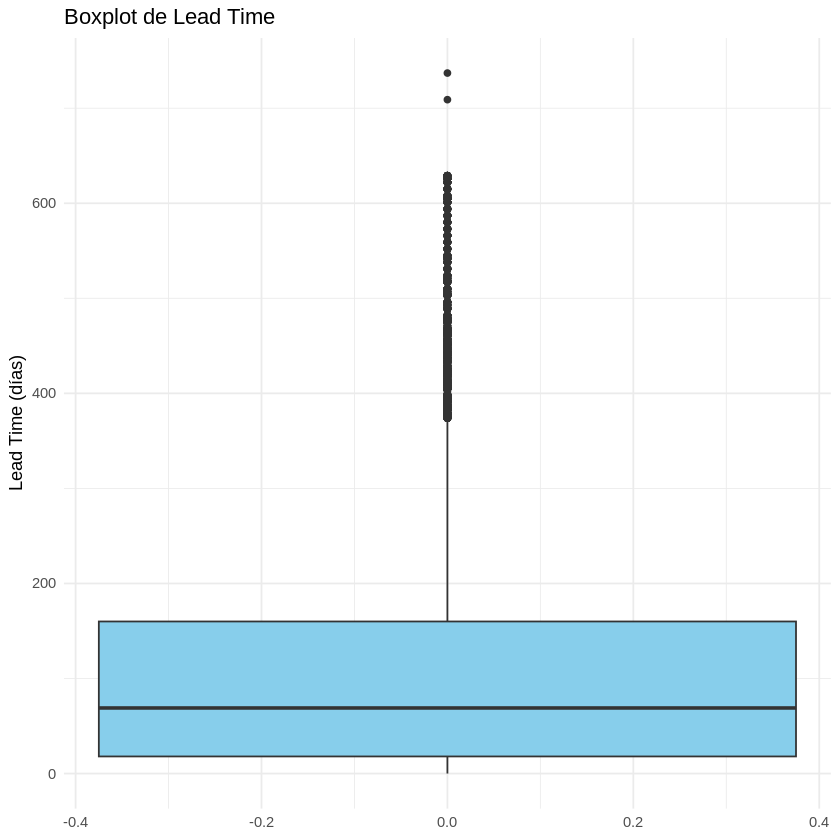

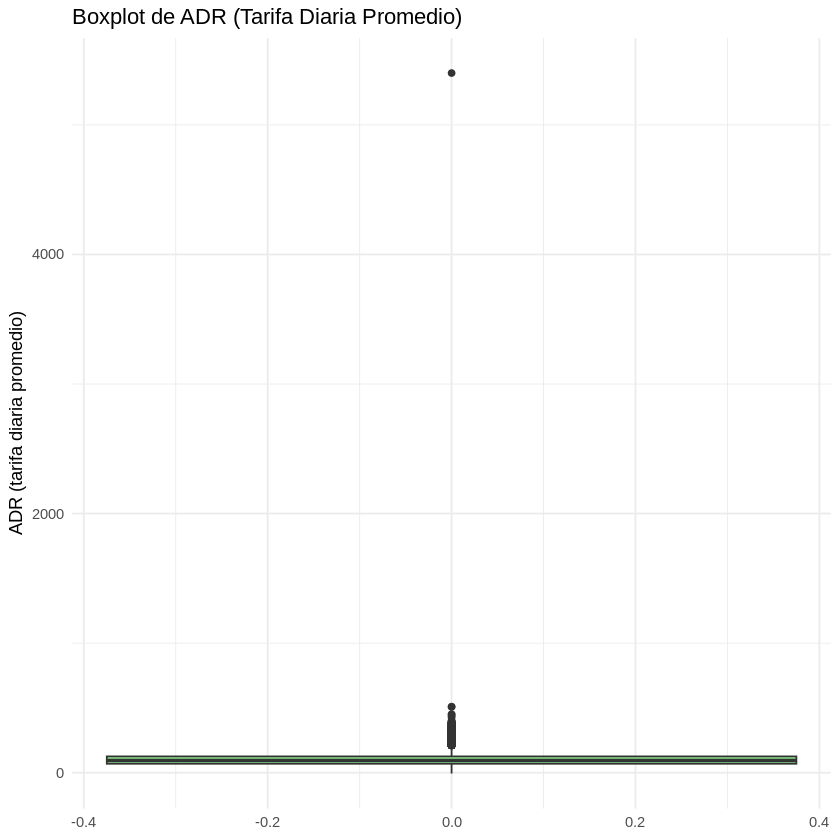

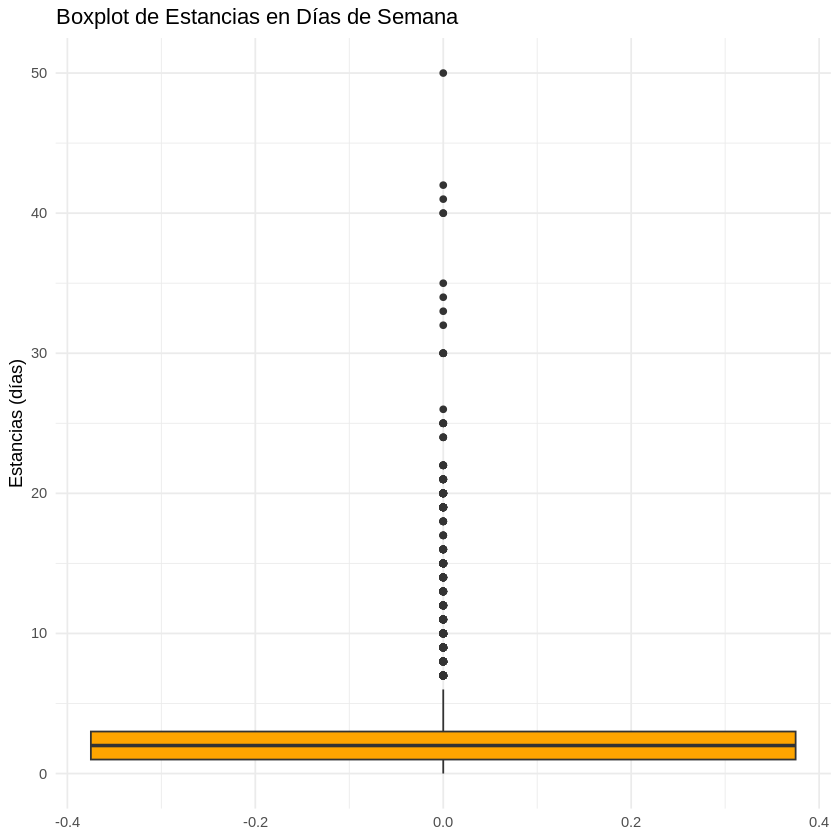

In [ ]:
library(ggplot2)

# Crear un boxplot para la variable "lead_time" (días antes de la llegada)
ggplot(hotel_data, aes(y = lead_time)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Boxplot de Lead Time", y = "Lead Time (días)") +
  theme_minimal()

# Crear un boxplot para la variable "adr" (tarifa diaria promedio)
ggplot(hotel_data, aes(y = adr)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Boxplot de ADR (Tarifa Diaria Promedio)", y = "ADR (tarifa diaria promedio)") +
  theme_minimal()

# Crear un boxplot para la variable "stays_in_week_nights" (estancias durante la semana)
ggplot(hotel_data, aes(y = stays_in_week_nights)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Boxplot de Estancias en Días de Semana", y = "Estancias (días)") +
  theme_minimal()

* Lead time (tiempo entre la reserva y la llegada): Es normal que algunas reservas se realicen con mucha anticipación (incluso meses antes), lo que genera valores atípicos. Sin embargo, estos valores pueden ser genuinos, ya que es razonable pensar que algunos clientes reservan con gran antelación.

* ADR (tarifa diaria promedio): Los valores extremos en las tarifas pueden reflejar eventos especiales, temporadas altas o promociones. Estos outliers podrían ser datos reales y, por tanto, eliminarlos podría distorsionar el análisis, ya que hay una variación natural en las tarifas de los hoteles.

* Stays in week nights (noches entre semana): Es posible que algunos huéspedes se queden por periodos largos (semanas o meses), lo cual puede parecer un outlier pero sigue siendo un comportamiento plausible en algunos casos, especialmente en estadías prolongadas en resorts.

In [ ]:
library(psych)

# Winsorización para la variable "lead_time", limitando al percentil 1% y 99%
hotel_data$lead_time_winsorized <- winsor(hotel_data$lead_time, trim = 0.01)

# Winsorización para la variable "adr" (tarifa diaria promedio)
hotel_data$adr_winsorized <- winsor(hotel_data$adr, trim = 0.01)

# Winsorización para la variable "stays_in_week_nights" (noches entre semana)
hotel_data$stays_in_week_nights_winsorized <- winsor(hotel_data$stays_in_week_nights, trim = 0.01)

# Verificar los resultados
summary(hotel_data$lead_time_winsorized)
summary(hotel_data$adr_winsorized)
summary(hotel_data$stays_in_week_nights_winsorized)

# Guardar el archivo limpio
write.csv(hotel_data, "hotel_bookings_limpio.csv", row.names = FALSE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    18.0    69.0   103.4   160.0   444.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   69.29   94.58  101.46  126.00  252.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.479   3.000  10.000 

In [ ]:
hotel_data_limpio <- read.csv("hotel_bookings_limpio.csv")

In [ ]:
head(hotel_data_limpio)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_winsorized,adr_winsorized,stays_in_week_nights_winsorized
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,0,Transient,0,0,0,Check-Out,2015-07-01,342,0,0
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,0,Transient,0,0,0,Check-Out,2015-07-01,444,0,0
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,0,Transient,75,0,0,Check-Out,2015-07-02,7,75,1
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,0,Transient,75,0,0,Check-Out,2015-07-02,13,75,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,Transient,98,0,1,Check-Out,2015-07-03,14,98,2
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,Transient,98,0,1,Check-Out,2015-07-03,14,98,2


In [ ]:
str(hotel_data_limpio)

'data.frame':	119390 obs. of  35 variables:
 $ hotel                          : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                    : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                      : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year              : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month             : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number       : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights           : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                         : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                           : chr  "BB" "BB" "BB" "BB" ...
 $ country    

In [ ]:
# Perdida de menos de 4%
((nrow(df)-nrow(hotel_data_limpio))/nrow(df))*100

[1] 0

1. ¿Cuántas reservas se realizan por tipo de hotel? ¿Qué tipo de hotel prefiere la gente?


Resort Hotel   City Hotel 
       40060        79330 

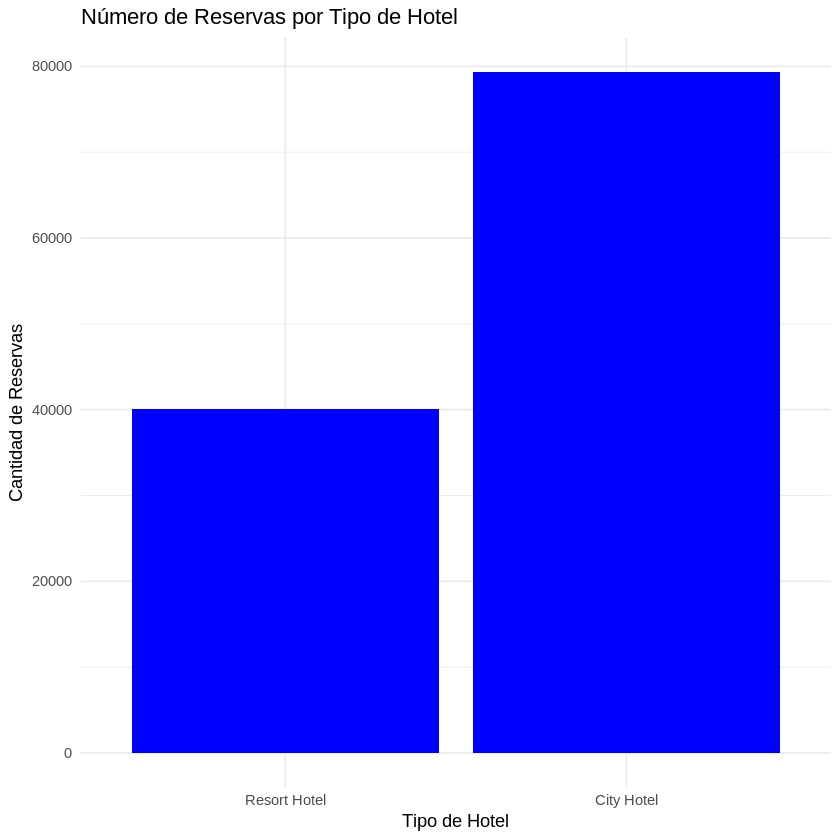

In [ ]:
# Cargar la librería para visualización
library(ggplot2)

# Gráfico de barras para el tipo de hotel
ggplot(hotel_data, aes(x = hotel)) +
  geom_bar(fill = "blue") +
  labs(title = "Número de Reservas por Tipo de Hotel", x = "Tipo de Hotel", y = "Cantidad de Reservas") +
  theme_minimal()

# Resumen numérico para contar las reservas por tipo de hotel
table(hotel_data$hotel)


2. ¿Está aumentando la demanda con el tiempo?


 2015  2016  2017 
21996 56707 40687 

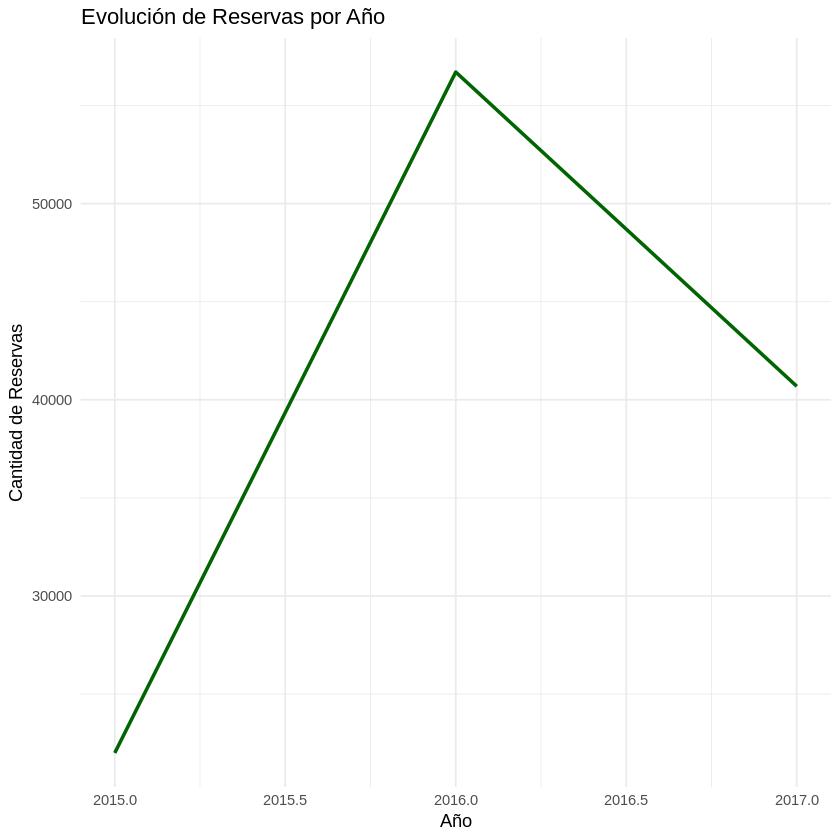

In [ ]:
# Gráfico de líneas para ver la evolución de las reservas por año
ggplot(hotel_data, aes(x = arrival_date_year)) +
  geom_line(stat = "count", color = "darkgreen", size = 1) +
  labs(title = "Evolución de Reservas por Año", x = "Año", y = "Cantidad de Reservas") +
  theme_minimal()

# Contar el número de reservas por año
table(hotel_data$arrival_date_year)

3. ¿Cuáles son las temporadas de reservas (alta, media, baja)?
4. ¿Cuándo es menor la demanda de reservas?


    April    August  December  February   January      July      June     March 
    11089     13877      6780      8068      5929     12661     10939      9794 
      May  November   October September 
    11791      6794     11160     10508 

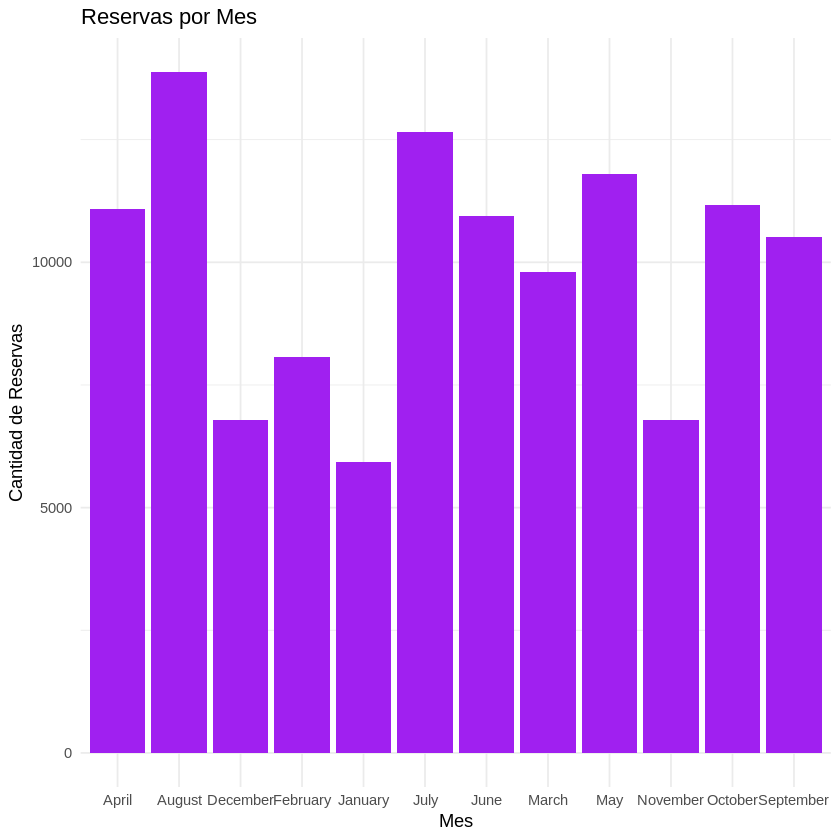

In [ ]:
# Gráfico de barras para ver la cantidad de reservas por mes
ggplot(hotel_data, aes(x = arrival_date_month)) +
  geom_bar(fill = "purple") +
  labs(title = "Reservas por Mes", x = "Mes", y = "Cantidad de Reservas") +
  theme_minimal()

# Ver la cantidad de reservas por mes
table(hotel_data$arrival_date_month)

5. ¿Cuántas reservas incluyen niños y/o bebés?


     0      1      2      3      9     10 
110058   5446   3772    111      1      2 

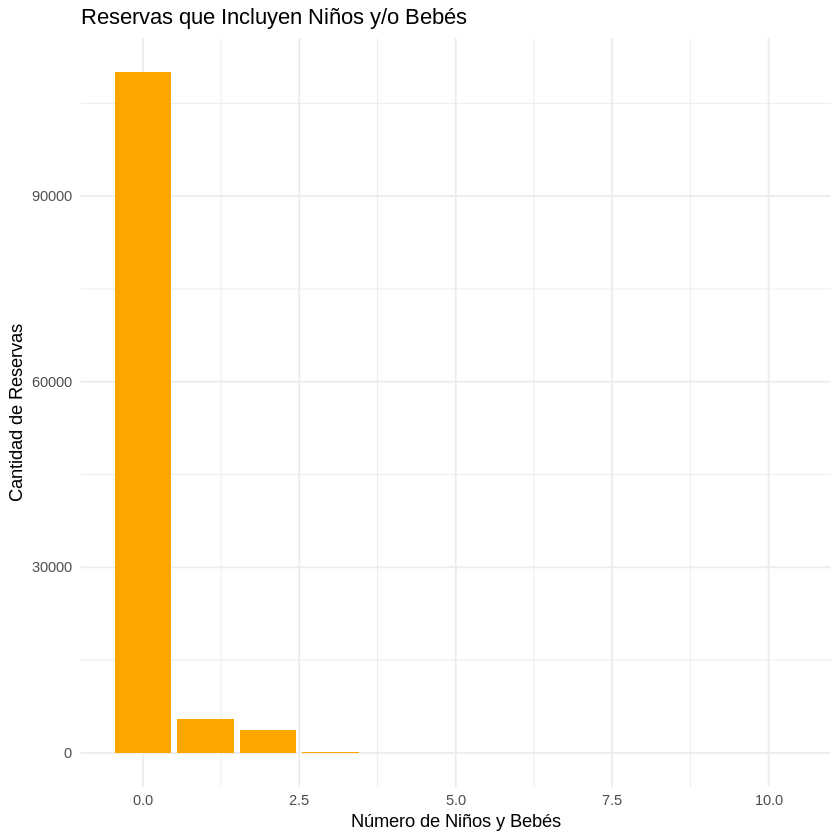

In [ ]:
# Crear una nueva columna que sume niños y bebés en cada reserva
hotel_data$children_babies <- hotel_data$children + hotel_data$babies

# Gráfico de barras para ver cuántas reservas incluyen niños o bebés
ggplot(hotel_data, aes(x = children_babies)) +
  geom_bar(fill = "orange") +
  labs(title = "Reservas que Incluyen Niños y/o Bebés", x = "Número de Niños y Bebés", y = "Cantidad de Reservas") +
  theme_minimal()

# Contar cuántas reservas incluyen niños y/o bebés
table(hotel_data$children_babies)


6. ¿Es importante contar con espacios de estacionamiento?


     0      1      2      3      8 
111974   7383     28      3      2 

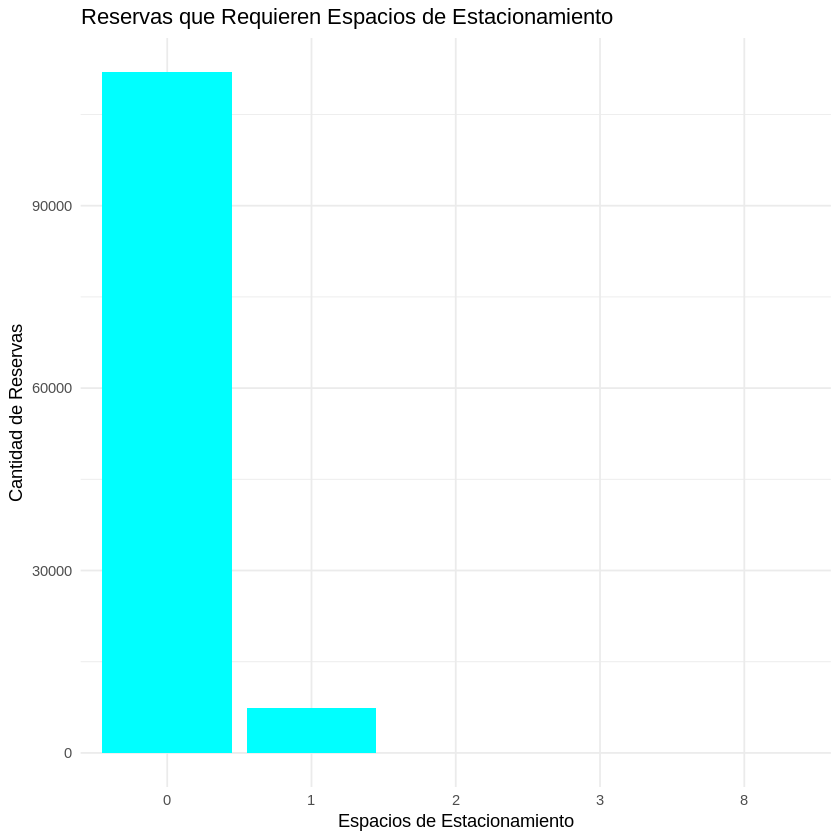

In [ ]:
# Gráfico de barras para mostrar cuántas reservas incluyen espacios de estacionamiento
ggplot(hotel_data, aes(x = factor(required_car_parking_spaces))) +
  geom_bar(fill = "cyan") +
  labs(title = "Reservas que Requieren Espacios de Estacionamiento", x = "Espacios de Estacionamiento", y = "Cantidad de Reservas") +
  theme_minimal()

# Contar cuántas reservas requieren espacios de estacionamiento
table(hotel_data$required_car_parking_spaces)


7. ¿En qué meses del año se producen más cancelaciones de reservas?


    April    August  December  February   January      July      June     March 
     4524      5239      2371      2696      1807      4742      4535      3149 
      May  November   October September 
     4677      2122      4246      4116 

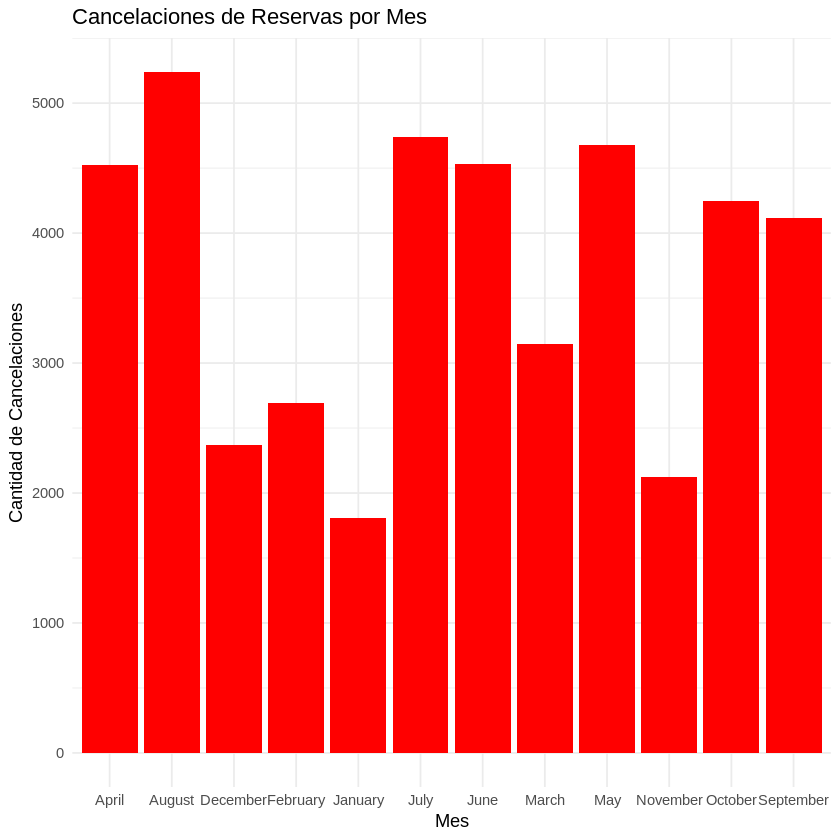

In [ ]:
# Filtrar las reservas canceladas
canceled_reservations <- subset(hotel_data, is_canceled == 1)

# Gráfico de barras para ver en qué meses se producen más cancelaciones
ggplot(canceled_reservations, aes(x = arrival_date_month)) +
  geom_bar(fill = "red") +
  labs(title = "Cancelaciones de Reservas por Mes", x = "Mes", y = "Cantidad de Cancelaciones") +
  theme_minimal()

# Ver cuántas cancelaciones hay por mes
table(canceled_reservations$arrival_date_month)